Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

**R&D Spend** -- Research and devolop spend in the past few years

 **Administration** -- spend on administration in the past few years


 **Marketing Spend** -- spend on Marketing in the past few years


 **State** -- states from which data is collected


**Profit**  -- profit of each state in the past few years

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
start=pd.read_csv('/content/50_Startups.csv')

In [ ]:
start

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# ***EDA***

In [ ]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
start.drop('State',inplace=True,axis=1)

In [ ]:
start

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
start.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
start.duplicated().sum()

0

In [ ]:
start1=start.rename({'R&D Spend':'rd','Administration':'adm','Marketing Spend':'ms','Profit':'p'},axis=1)

In [ ]:
start1

,rd,adm,ms,p
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
start1.corr()

,rd,adm,ms,p
rd,1.000000,0.241955,0.724248,0.972900
adm,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
p,0.972900,0.200717,0.747766,1.000000


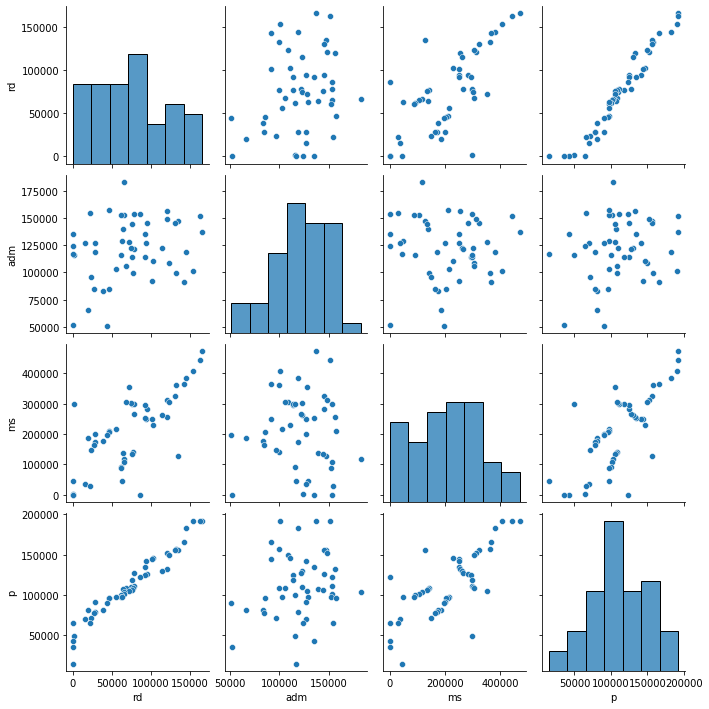

In [ ]:
sns.pairplot(start1)

In [ ]:
#mlr model fitting
model=smf.ols('p~rd+adm+ms',data=start1).fit()

In [ ]:
model.params

Intercept    50122.192990
rd               0.805715
adm             -0.026816
ms               0.027228
dtype: float64

In [ ]:
print(model.tvalues,'\n',np.round(model.pvalues,5))

Intercept     7.626218
rd           17.846374
adm          -0.525507
ms            1.655077
dtype: float64 
 Intercept    0.00000
rd           0.00000
adm          0.60176
ms           0.10472
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# ***slr***

In [ ]:
m_adm=smf.ols('p~adm',data=start1).fit()

In [ ]:
m_adm.pvalues

Intercept    0.003824
adm          0.162217
dtype: float64

In [ ]:
m_ms=smf.ols('p~ms',data=start1).fit()

In [ ]:
m_ms.pvalues

Intercept    4.294735e-10
ms           4.381073e-10
dtype: float64

In [ ]:
m_adm_ms=smf.ols('p~adm+ms',data=start1).fit()

In [ ]:
m_adm_ms.pvalues

Intercept    2.589341e-01
adm          1.729198e-02
ms           9.727245e-11
dtype: float64

# ***VIF***

In [ ]:
rsq_rd=smf.ols("rd~adm+ms",data=start1).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_adm=smf.ols("adm~ms+rd",data=start1).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_ms=smf.ols("ms~adm+rd",data=start1).fit().rsquared
vif_ms=1/(1-rsq_ms)

In [ ]:
d={'independent_variables':['rd','adm','ms'],'vif':[vif_rd,vif_adm,vif_ms]}

table=pd.DataFrame(d)


In [ ]:
table

,independent_variables,vif
0,rd,2.468903
1,adm,1.175091
2,ms,2.326773


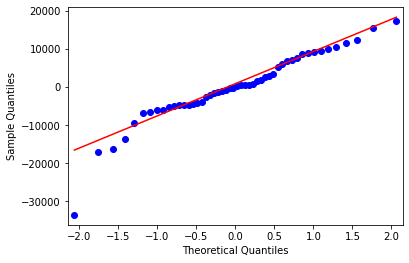

In [ ]:
#Q_Q PLOT
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.show()


In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

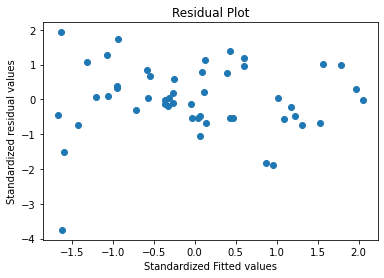

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# ***Regression plots***

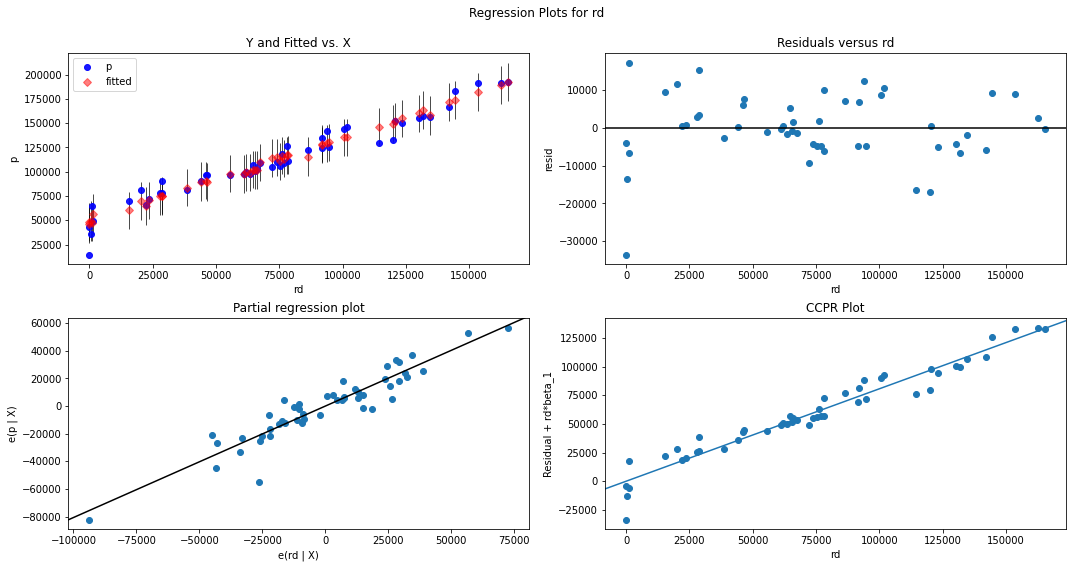

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rd", fig=fig)
plt.show()

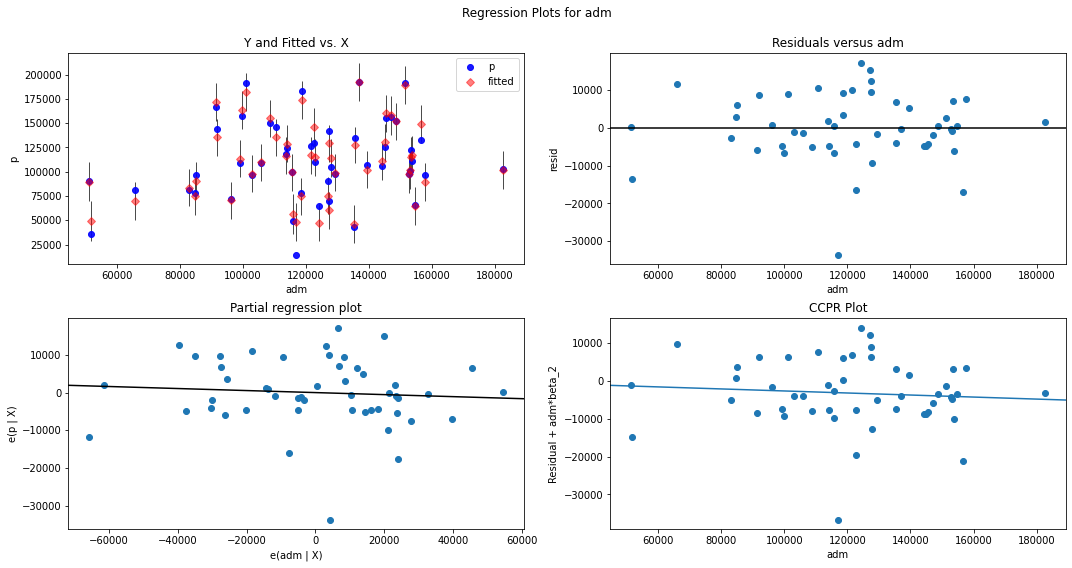

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "adm", fig=fig)
plt.show()

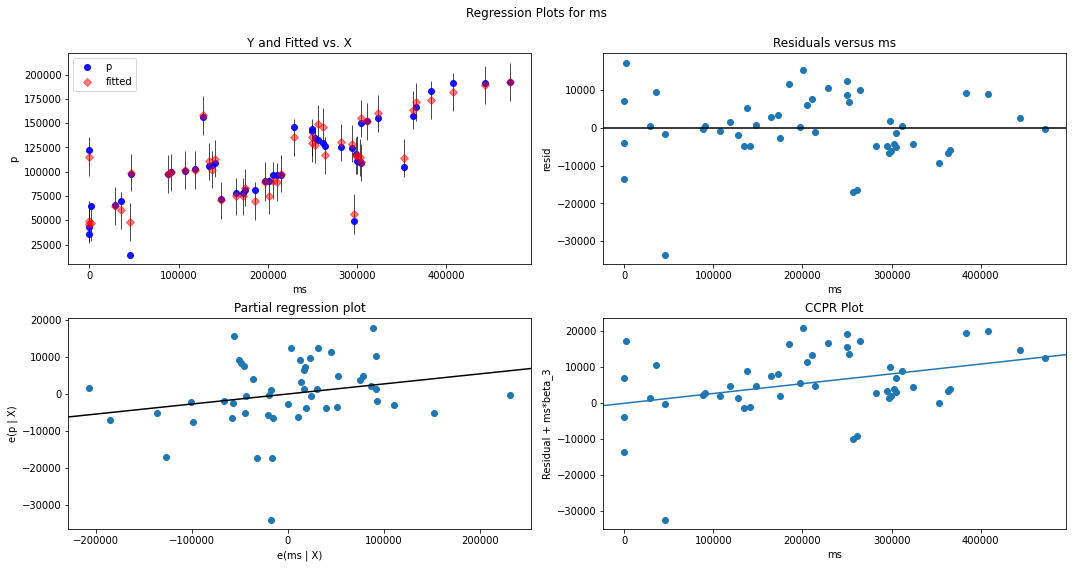

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ms", fig=fig)
plt.show()

# ***COOKS DISTANCE INFLUENCER POINTS***

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


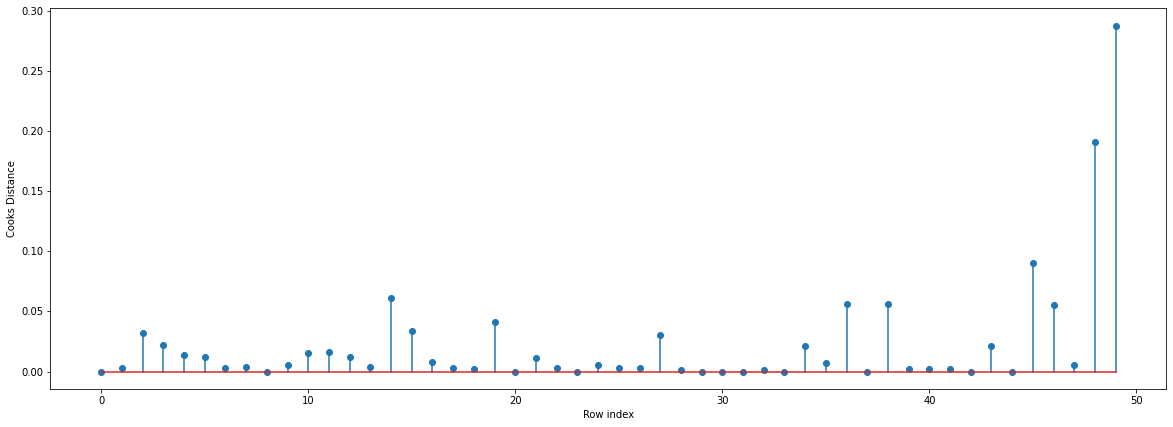

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start1)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

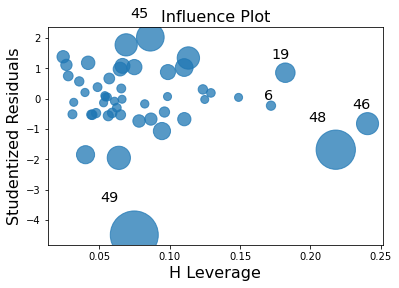

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
start_new=start1.copy()

In [ ]:
start_new

In [ ]:
start2=start_new.drop(start_new.index[[49]],axis=0).reset_index(drop=True)

In [ ]:
start2

,rd,adm,ms,p
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
start2.isna().sum()

rd     0
adm    0
ms     0
p      0
dtype: int64

In [ ]:
start2.shape


(49, 4)

In [ ]:
#mlr model fitting
model2=smf.ols('p~rd+adm+ms',data=start2).fit()

In [ ]:
model2.tvalues

Intercept     9.450782
rd           20.469501
adm          -0.517889
ms            1.825383
dtype: float64

In [ ]:
model2.pvalues

Intercept    2.960000e-12
rd           1.971077e-24
adm          6.070728e-01
ms           7.458443e-02
dtype: float64

In [ ]:
(model2.rsquared,model2.rsquared_adj)

(0.9613162435129848, 0.9587373264138505)

# ***model prediction***

In [ ]:

input=pd.DataFrame({'rd':1000,'adm':50988,'ms':500000},index=[0])

In [ ]:
a=model2.predict(input)

In [ ]:
print('price',a)

price 0    64650.250238
dtype: float64


In [ ]:
b={'model':['model','model2'],'R^2':[model.rsquared,model2.rsquared]}

In [ ]:
t=pd.DataFrame(b)

In [ ]:
#all models rsquared values

t

,model,R^2
0,model,0.950746
1,model2,0.961316
